In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
data=pd.read_csv("diabetes.csv")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
3                     0.167   21        0  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   439.000000  439.000000     439.000000     439.000000  439.000000   
mean      3.519362  124.207289      71.280182      29.560364  139.348519   
std       3.346635   31.572058      12.459115      10.779669  122.234706   

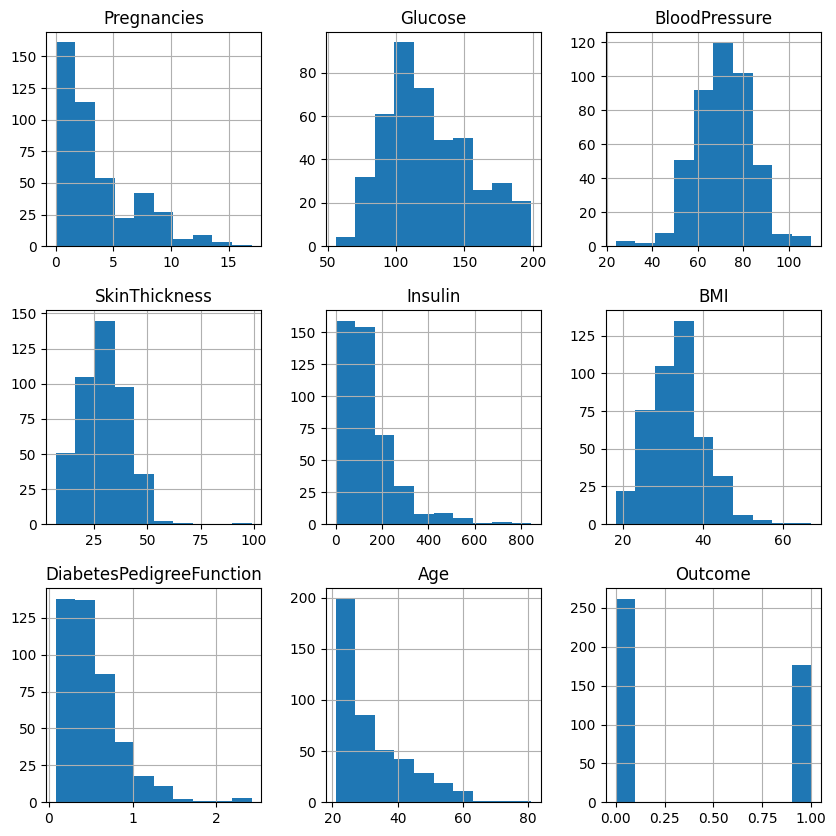

In [9]:
#preliminary data analysis and processing

data.drop(data[data['Glucose']==0].index,inplace=True)
data.drop(data[data['BloodPressure']==0].index,inplace=True)
data.drop(data[data['SkinThickness']==0].index,inplace=True)
data.drop(data[(data['Insulin']==0)&(data['Outcome']==0)].index,inplace=True)
data.drop(data[(data['BMI']==0)].index,inplace=True)

print(data.head())
print(data.describe())
data.hist(figsize=(10,10))
plt.show()

In [10]:
#data splitting
x=data.drop('Outcome', axis=1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=114)

Accuracy: 0.7379310344827587


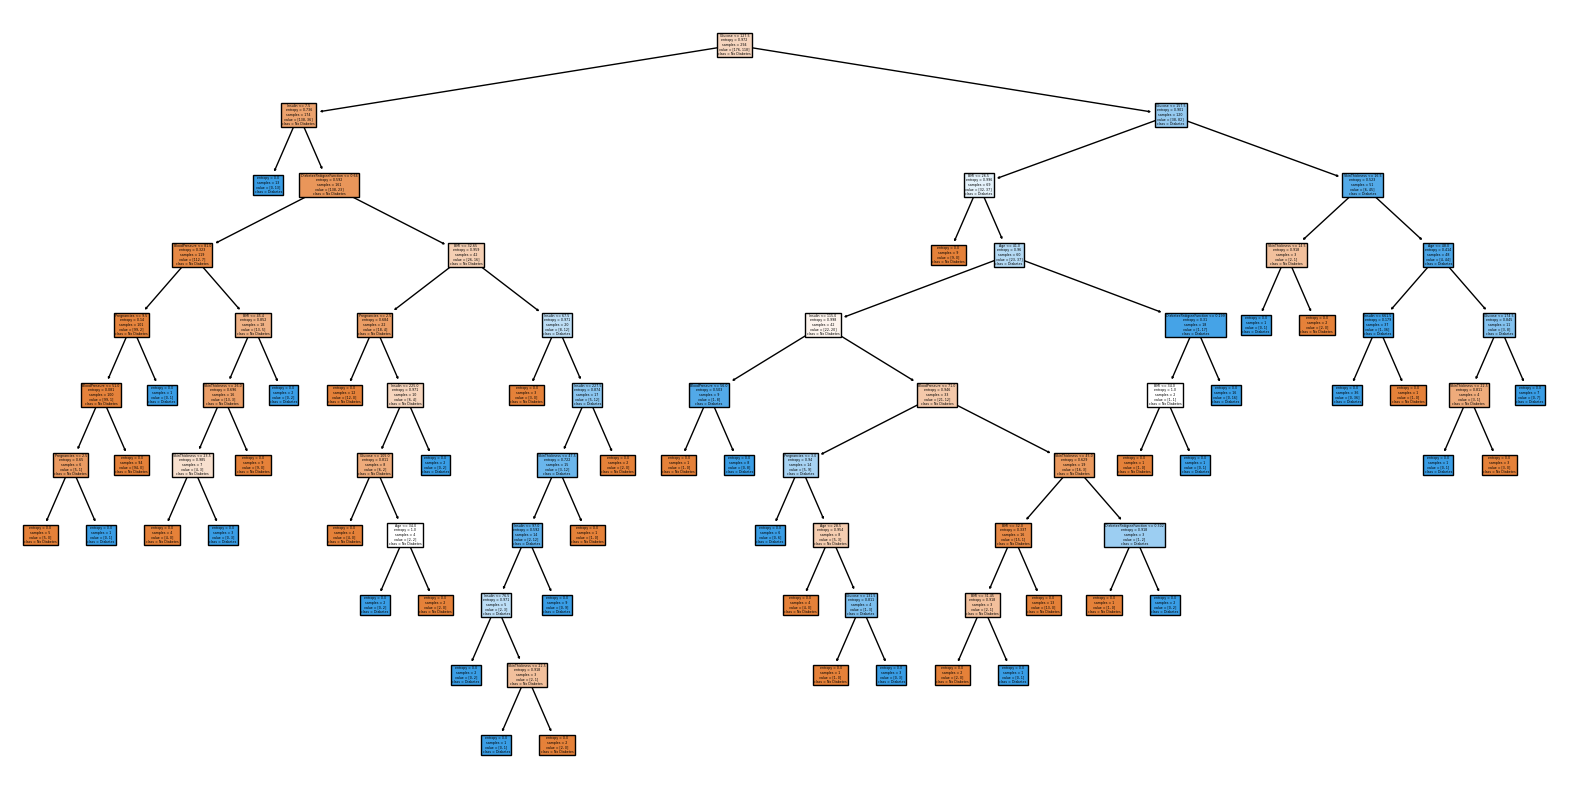

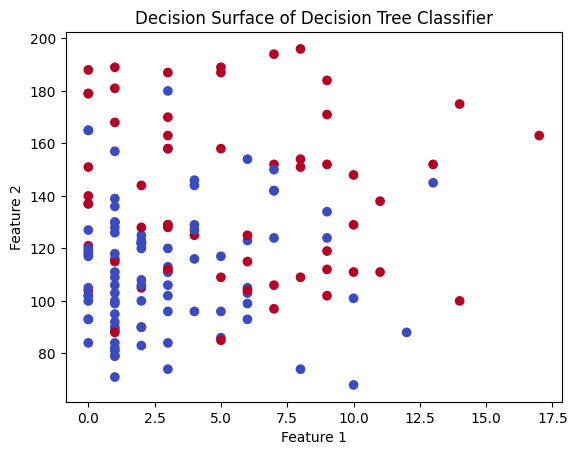

In [11]:
#uni-variance tree method
uv_model=tree.DecisionTreeClassifier(criterion='entropy',random_state=2)

uv_model.fit(x_train,y_train)

uv_y_pred=uv_model.predict(x_test)
acc=accuracy_score(y_test,uv_y_pred)
print("Accuracy:",acc)

#show the tree
plt.figure(figsize=(20,10))
tree.plot_tree(uv_model,filled=True,feature_names=x.columns,class_names=['No Diabetes','Diabetes'])
plt.show()

#plotting the decision surface
plt.scatter(x_test.iloc[:, 0],x_test.iloc[:, 1],c=y_test,cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface of Decision Tree Classifier')
plt.show()


In [12]:
#ensemble part
e_model=RandomForestClassifier(n_estimators=100,random_state=2)

e_model.fit(x_train,y_train)

e_y_pred=e_model.predict(x_test)
acc=accuracy_score(y_test,e_y_pred)
print("Accuracy:",acc)

Accuracy: 0.8137931034482758


#### Result analysis
The ensemble model has higher accuracy compared to the uni-variate tree method. This is expected as ensemble models combine multiple models to improve performance.